# PREDICTION AND ANALYSIS OF CONCRETE COMPRESSIVE STRENGTH USING SUPPORT VECTOR REGRESSION
DATASET SOURCE -"https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/"

# Importng the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [3]:
dataset=pd.read_csv('concrete_uci.csv')

In [4]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## SPLITTING THE DATSET TO DEPENDENT AND INDEPENDENT 

In [5]:
X=dataset.iloc[:,:-1].values #INDEPENDENT VARIABLS
y=dataset.iloc[:,8].values  #DEPENDENT VARIABLES
y=y.reshape(-1, 1)

## SVR Algorithm Needs Feature Scaling Explicitly

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## SPLITTING THE DATASET INTO TRAINING AND TESTING SETS

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## SVR Model Creation

In [8]:
#creating a SVR model
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf',gamma='auto')
reg.fit(X_train, y_train)


C:\Users\sai prakesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## LINEAR MODEL CREATION
#HERE WE ARE USING THE SAME TRAIN_TEST SPLIT DATA FOR THE BOTH LINEAR AND SVR MODELS 

In [9]:
#creating linear model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Accuracy Difference between Linear and SVR models

In [10]:
#FOR LINEAR MODEL
acc1=regressor.score(X_test,y_test)
acc2=reg.score(X_test,y_test)
print("THE ACCURACY OF LINEAR  MODEL IS : ",acc1*100,"%")
print("THE ACCURACY OF THE SVR MODEL IS : ",acc2*100,"%")

THE ACCURACY OF LINEAR  MODEL IS :  62.75531792314848 %
THE ACCURACY OF THE SVR MODEL IS :  82.5547840833725 %


## Visualization

Text(0.5, 1.0, 'ACCURACY OF LINEAR V/S SVR')

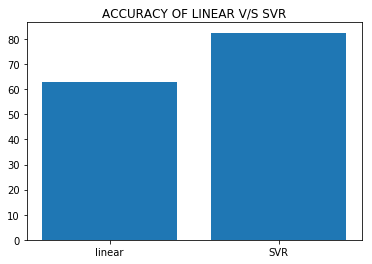

In [16]:
XA=[]
XA.append(acc1*100)
XA.append(acc2*100)
plt.bar(['linear','SVR'],height=XA)
plt.title("ACCURACY SCORE OF LINEAR V/S SVR")

## OUR MODEL IS READY AND CAN BE USED TO PREDICT THE CONCRETE COMPRESSIVE STRENGTH WITH AN ACCURACY OF 82.56 %